In [109]:
include("../src/shared.jl")

IPOPT_solver_history (generic function with 3 methods)

Loading linear_system_solvers ...


In [110]:
##############################################
#### Tests on individual linear programs.
##############################################
# DOWNLOAD ADLITTLE netlib LP problem
LP = read_lp("FINNIS","../netlib");
build_LP() = build_LP_model_as_NLP(LP)

# solve it with IPOPT
m = build_LP()
setsolver(m, IpoptSolver(print_level=3,bound_relax_factor=0.0))
status = solve(m)

:Optimal

Total number of variables............................:     1019
                     variables with only lower bounds:      983
                variables with lower and upper bounds:       36
                     variables with only upper bounds:        0
Total number of equality constraints.................:      497
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 164

                                   (scaled)                 (unscaled)
Objective...............:   4.2883749362378094e+03    1.7279167141757737e+05
Dual infeasibility......:   2.3841857910156250e-07    9.6066098213195800e-06
Constraint violation....:   1.0913936421275139e-11    1.0913936421275139e-11
Complementarity.........:   4.1118404857489861e-09    1.6567856138958429e-07
Overall NLP 

In [108]:
## compute dual variables sequence, etc for BANDM for IPOPT
## because this IPOPT does not provide this information by default we have to use a hack 
## which takes significantly longer than just solving the linear program normally
## (we solve the LP with a maximum iteration of k = 1,...,max_iter)
max_iter = 100; # so it doesn't take too long
#IPOPT_hist = IPOPT_solver_history(build_LP, max_iter);
#@show length(IPOPT_hist) - 1 # should be same as number of iterations given in previous cell
#
solver = IpoptSolver(print_level=1,max_iter=max_iter,bound_relax_factor=0.0)
#@show solver.options
IPOPT_hist = IPOPT_solver_history(build_LP, solver);


In [111]:
## compute trajectory for one-phase
m = build_LP()
setsolver(m,OnePhase.OnePhaseSolver(output_level=2))
solve(m)

OP_hist = m.internalModel.inner.hist
OP_hist_concise = OnePhase.major_its_only(OP_hist);
@show length(OP_hist_concise) - 1 # should be equal to number of iterations

projecting onto bounds ...
(ais, bis) = (1:994, 995:2049)
(δ_s, δ_y, norm(g)) = (19364.8, 1152.196700395337, 6650.771107071947)
it step  eta     α_P        α_D        ls |dx|       |dy|       N err      |mu         dual       primal     cmp scaled infeas?    |delta      #fac  |x|        |y|        ∇phi       phi        
0    i  2.11e+07   0.00e+00   0.00e+00   0 0.00e+00   0.00e+00   2.23e-314  |2.11e+07   9.90e+01   6.28e+04   1.00e+00   Inf        |0.00e+00   0  0  2.51e+02   4.22e+11   2.09e+13   -1.25694e+11
1    s  2.11e+07   1.00e+00   9.00e-01   1 1.24e+02   2.11e+11   8.33e-15   |2.11e+07   1.77e+01   6.28e+04   1.96e-01   Inf        |0.00e+00   1  1  3.75e+02   2.36e+11   8.27e+09   -2.09981e+11
11   a  2.05e+05   7.38e-01   4.75e-01   1 3.41e+04   9.15e+09   7.64e-12   |2.05e+05   3.26e-03   6.09e+02   6.80e-02   Inf        |0.00e+00   1  1  8.14e+04   8.05e+09   3.35e+07   -2.48184e+09
21   a  2.54e+02   6.55e-01   5.67e-01   1 2.73e+03   3.69e+06   5.70e-12   |2.54e+02   2.

40

length(OP_hist_concise) - 1 = 40


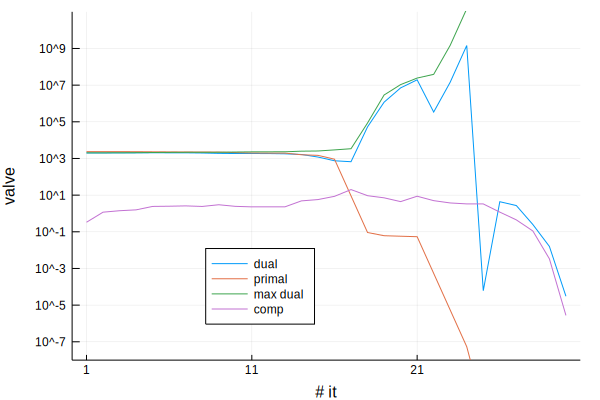

In [112]:
# PLOT THE TRAJECTORY FOR IPOPT
plot_trajectory(IPOPT_hist,min_y=10.0^(-8.0),max_y=10.0^(11.0))

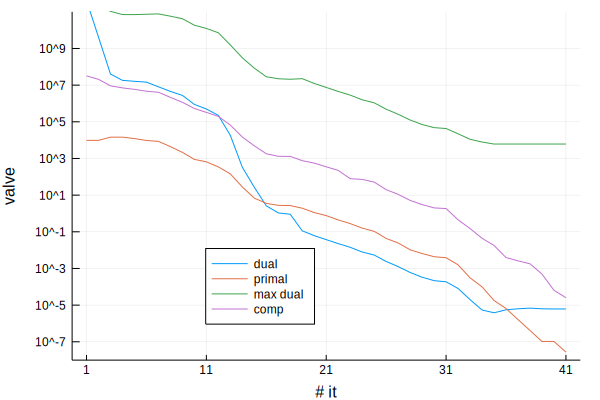

In [113]:
# plot the trajectory for one-phase
plot_trajectory(OP_hist_concise,min_y=10.0^(-8.0),max_y=10.0^(11.0))